# Krittika Convener Selection
## Python Assignment

1. You may find the KSP tutorials useful: https://github.com/krittikaiitb/tutorials - Tutorials 1,2,3, and 4 are particularly relevant. These cover basic python, numpy, functions in python and matplotlib respectively.

2. A helpful reminder that executing a cell with help (for example: help(np.loadtxt) or np.loadtxt?) will show the documentation for that function.

3. The use of internet is completely ALLOWED for solving this assignment.

4. Feel free to use multiple cells for your solutions, this would make your code easier to understand in a step-by-step fashion. But keep them separate for each question (don't use a cell to solve Q1 after Q2).

5. Try to keep your code neat and make use of comments and/or markdown cells to explain what you have done.

In [1]:
# try to put all your imports here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import math as m
import datetime

### Q1: Parsing Form Responses
Suppose that you are a convener and it has been a few months into your tenure. We have organized an event focused at the newly joining freshers(your juniors).

We floated a Google form to collect their details and get them registered. We planned to contact them all via WebMail to send them details of the event.

While going through the responses, you discover that your co-convener forgot to filter inputs in the form! There appear to be many invalid roll numbers - we cannot contact these students via WebMail. Here are the first few entries:

| Sr. No. | Name | Roll Number | Contact Number |
|---------|------|-------------|----------------|
| 1       | MV   | 220070044   | 986937546      |
| 2       | DV   | 22b280013   | 961101307      |
| 3       | RR   | 21070042    | 908204532      |
| 4       | YB   | 220030019   | 947226579      |

As you can see, we can already see an erroneous LDAP in the $3$rd input.

Your task here is to find out the submissions with wrong roll numbers and filter them out. We would reach out to such people using their contact numbers. Your final output should be the names and contact numbers of these people.

*PS : As you might suspect, this data is sourced from an actual event from our tenure. It has been anonymized and the errors have been exaggerated :)*

In [2]:
file1 = 'Dataset_Q1.csv' #this is the CSV file that countains all the responses

Feel free to use any libraries/standard functions that you might need to solve this problem.

In [6]:
# Solution code
df = pd.read_csv(file1)
rolls = np.array(df['Roll Number']) #array of roll numbers


list_of_mistakes = []
id_mistakes = []
for i in range(np.size(rolls)):
  if len(rolls[i]) != 9 or rolls[i][0:2] not in ['20','21','22']:  #If lengths is wrong, or year is wrong, it is a erroneous roll number
      list_of_mistakes.append([df.iloc[i]['Name'], df.iloc[i]['Contact Number']])
      id_mistakes.append(i) #mark IDs of erroneous data

for i in list_of_mistakes:
  print(i)

['RR', 908204532]
['KA', 909372264]
['BP', 980849718]
['AP', 932737329]
['SP', 936914944]
['JS', 979691534]
['PM', 996497703]
['VN', 918746674]
['SN', 902766352]
['AR', 992993873]
['SS', 914286714]
['DS', 914030157]
['AB', 934220771]
['MM', 918359105]


#### Bonus part:
Amongst the valid entries, what proportion are actually freshers? Remember that we intended to target them with this event. The majority seem to be freshers but you will also find some second and third year students. You can identify each of these groups by the first two digits of their roll numbers. 

Your task is to graphically depict the number of applicants across the three batches.

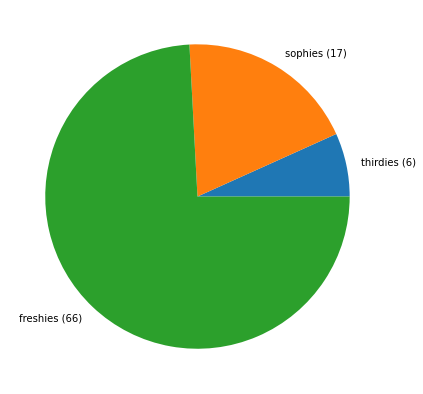

In [7]:
# Solution code
n_22 = n_21 = n_20 = 0

df = pd.read_csv(file1)
rolls = np.array(df['Roll Number'])


for i in range(np.size(rolls)): #count number of students from each year
  if i not in id_mistakes:
    year = rolls[i][0:2]
    if year == '20':
      n_20 += 1
    elif year == '21':
      n_21 += 1
    elif year == '22':
      n_22 += 1

#Decided to make a pie chart as it properly demonstrates the proportion of different quantities relative to each other as well as relative to the whole

years = ['thirdies (' + str(n_20) + ')','sophies (' + str(n_21) + ')','freshies (' + str(n_22) + ')'] #labels
data = [n_20,n_21,n_22] #data values

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = years)

plt.show()
#plotting and displaying the pie chart


### Q2: A New Discovery
During one of our regular stargazing sessions, you and your co-conveners discover a new blip of light that shouldn't be there. After examining it a bit, you realise that this object is not quite like anything the world has seen before. You share your data with club seniors and make a startling find - its the first of its kind of a completely new class of objects. An ex-secy of the club, Siddhant Tripathy, analyses it extensively and declares that its actually the first ever **endoplanet** to be found. You and your team are now international celebrities, but its time to organise an event so that people from insti can see this.

Your task is to find out when exactly Tripps' endoplanet would be at its brightest and organise a stargazing session on that date so that everyone can see it for themselves. You have data from a month of observations of this object and you need to extrapolate it to find the peak.

In [8]:
file2 = 'Dataset_Q2.csv'

According to your analysis, this object is in a special orbit that gives it a roughly Gaussian light curve i.e. the plot of [magnitude](https://en.wikipedia.org/wiki/Apparent_magnitude) v/s time roughly follows an inverted Gaussian function. Recall that a generic Gaussian function with unit amplitude is given by

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left({-\frac{1}{2}{\left(\frac{x-\mu}{\sigma}\right)}^2}\right)$$ 

where $\mu$ is the mean of the distribution it describes and $\sigma$ is the standard deviation. More about it [here](https://archive.lib.msu.edu/crcmath/math/math/g/g087.htm).

Your task is to find the date at which the endoplanet will be at it's brightest, along with how bright its expected to be. Also plot the original data along with the fitted curve.

You can do this by fitting a gaussian to the light curve data and locating its extremum. You may find `scipy.optimize.curve_fit` useful. 

**Important** : Our fit function must be a Gaussian with a vertical offset. The problem is that `curve_fit` tends to misbehave in this particular example when you ask it to guess that offset, so assume it to be $9.0$ to solve this problem. This, of course, implies that the baseline magnitude of the object is $9.0$

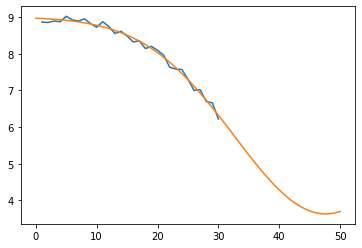

In [10]:
# Solution code

def gaussian(t, sig, mu, factor): #example function(inverted gaussian)
                                  #sig = standard dev, mu = mean value, factor = scaling factor
  const = factor/(sig*m.sqrt(2*m.pi))
  exponential = -( ( (t-mu) / sig) **2) /2
  return 9 - const*np.exp(exponential)

  

df = pd.read_csv(file2)
time = np.array(df['Night No.'])
mag = np.array(df['Magnitude'])

param, cov = curve_fit(gaussian, time, mag) #using scipy to find optimized values that fir the data


x = np.linspace(0, 50, num = 100)
y = gaussian(x,param[0], param[1], param[2]) #create an approximate plot of the gaussian

plt.plot(time,mag) #plot the data in blue
plt.plot(x,y) #plot the fit curve in red
plt.show()




In [11]:
days_to_max = int(x[np.argmin(y)]) #find number of days to max brightness
max_brightness = np.min(y) #find max brightness
dates = np.array(df['Date']) #get the date values from the file

months = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, "Jul":7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec': 12} #dictionary of month names and numbers

l = dates[1].split('-')
day1 = int(l[0])#find day when day number = 1
month1 = months[l[1]] #find month number when day number = 1
d1 = datetime.date(2022, month1, day1) #turn the data into a dat object
dmax = d1 + datetime.timedelta(days = days_to_max - 1) #add the required number of days
print('date of max brightness = ', dmax.day,'-', dmax.month) #print out the new date
print('expected magnitude = ', max_brightness)

date of max brightness =  28 - 6
expected magnitude =  3.6343026529805504


#### Bonus part:

Can this date be trusted? We wouldn't want to claim the endoplanet is the brightest on a particular day and then have it brighten up even more later. Try to ascertain the error in this predicted date. Read the documentation of `curve_fit` and try to understand the statistical significance of the quantities it returns.

In [12]:
# Solution code
perr = np.sqrt(np.diag(cov)) #find the standard devation in the outputs of each optimised parameter
l0 = [param[0] - perr[0], param[0], param[0] + perr[0]]
l1 = [param[1] - perr[1], param[1], param[1] + perr[1]]
l2 = [param[2] - perr[2], param[2], param[2] + perr[2]]
#create a list of all acceptable values of the parameters within one standard deviation

day_range = []

#find the day of max brightness in each possible combination of parameters. use that to find a range of outcomes that scipy could have given
for i in l0:
  for j in l1:
    for k in l2:
      x = np.linspace(0, 50, num = 100)
      y = gaussian(x,i, j, k)
      days_to_max = int(x[np.argmin(y)])
      day_range.append(days_to_max)

day_min = np.min(day_range)
day_max = np.max(day_range)
error = (day_max-day_min)/2 #calculate error by (max-min)/2
print('Error =', error, 'days')


Error = 4.5 days
